In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import matplotlib.patches as mpatches

In [2]:
#reading the .csv files - Jhon
df_app = pd.read_csv('D:/OneDrive/Programacion/coderhouse/coderhouse-proyecto-final/datasets/credit_card/application_data.csv')

In [3]:
#Checking for th unique values in each column
app_data = df_app.dropna(axis=1)
app_data.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
WEEKDAY_APPR

In [4]:
#a quick look for the shape of the data
df_app.shape

(307511, 122)

In [5]:
#here we see the missing values in each column
df_app.head(9)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
#a view of the format of each column
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
#here we see the missing values in each column
pd.DataFrame(df_app.isna().sum(),columns=['Missings'])

,Missings
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [9]:
#analysis for GENDER of the clients and AMT columns
dfA = {}
for i in df_app:
    if 'CODE_GENDER' in i:
        dfA[i] = df_app[i]
    elif 'AMT' in i:
        dfA[i] = df_app[i]
    elif 'TARGET' in i:
        dfA[i] = df_app[i]

In [10]:
#here we need to limit the data for plotting
dfA = pd.DataFrame(dfA)
dfA.shape
dfB = dfA.iloc[:100000,:]

In [11]:
dfB.shape

(100000, 12)

In [12]:
dfB.head()

,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,M,202500.0,406597.5,24700.5,351000.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,F,270000.0,1293502.5,35698.5,1129500.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,M,67500.0,135000.0,6750.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,F,135000.0,312682.5,29686.5,297000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,M,121500.0,513000.0,21865.5,513000.0,0.0,0.0,0.0,0.0,0.0,0.0


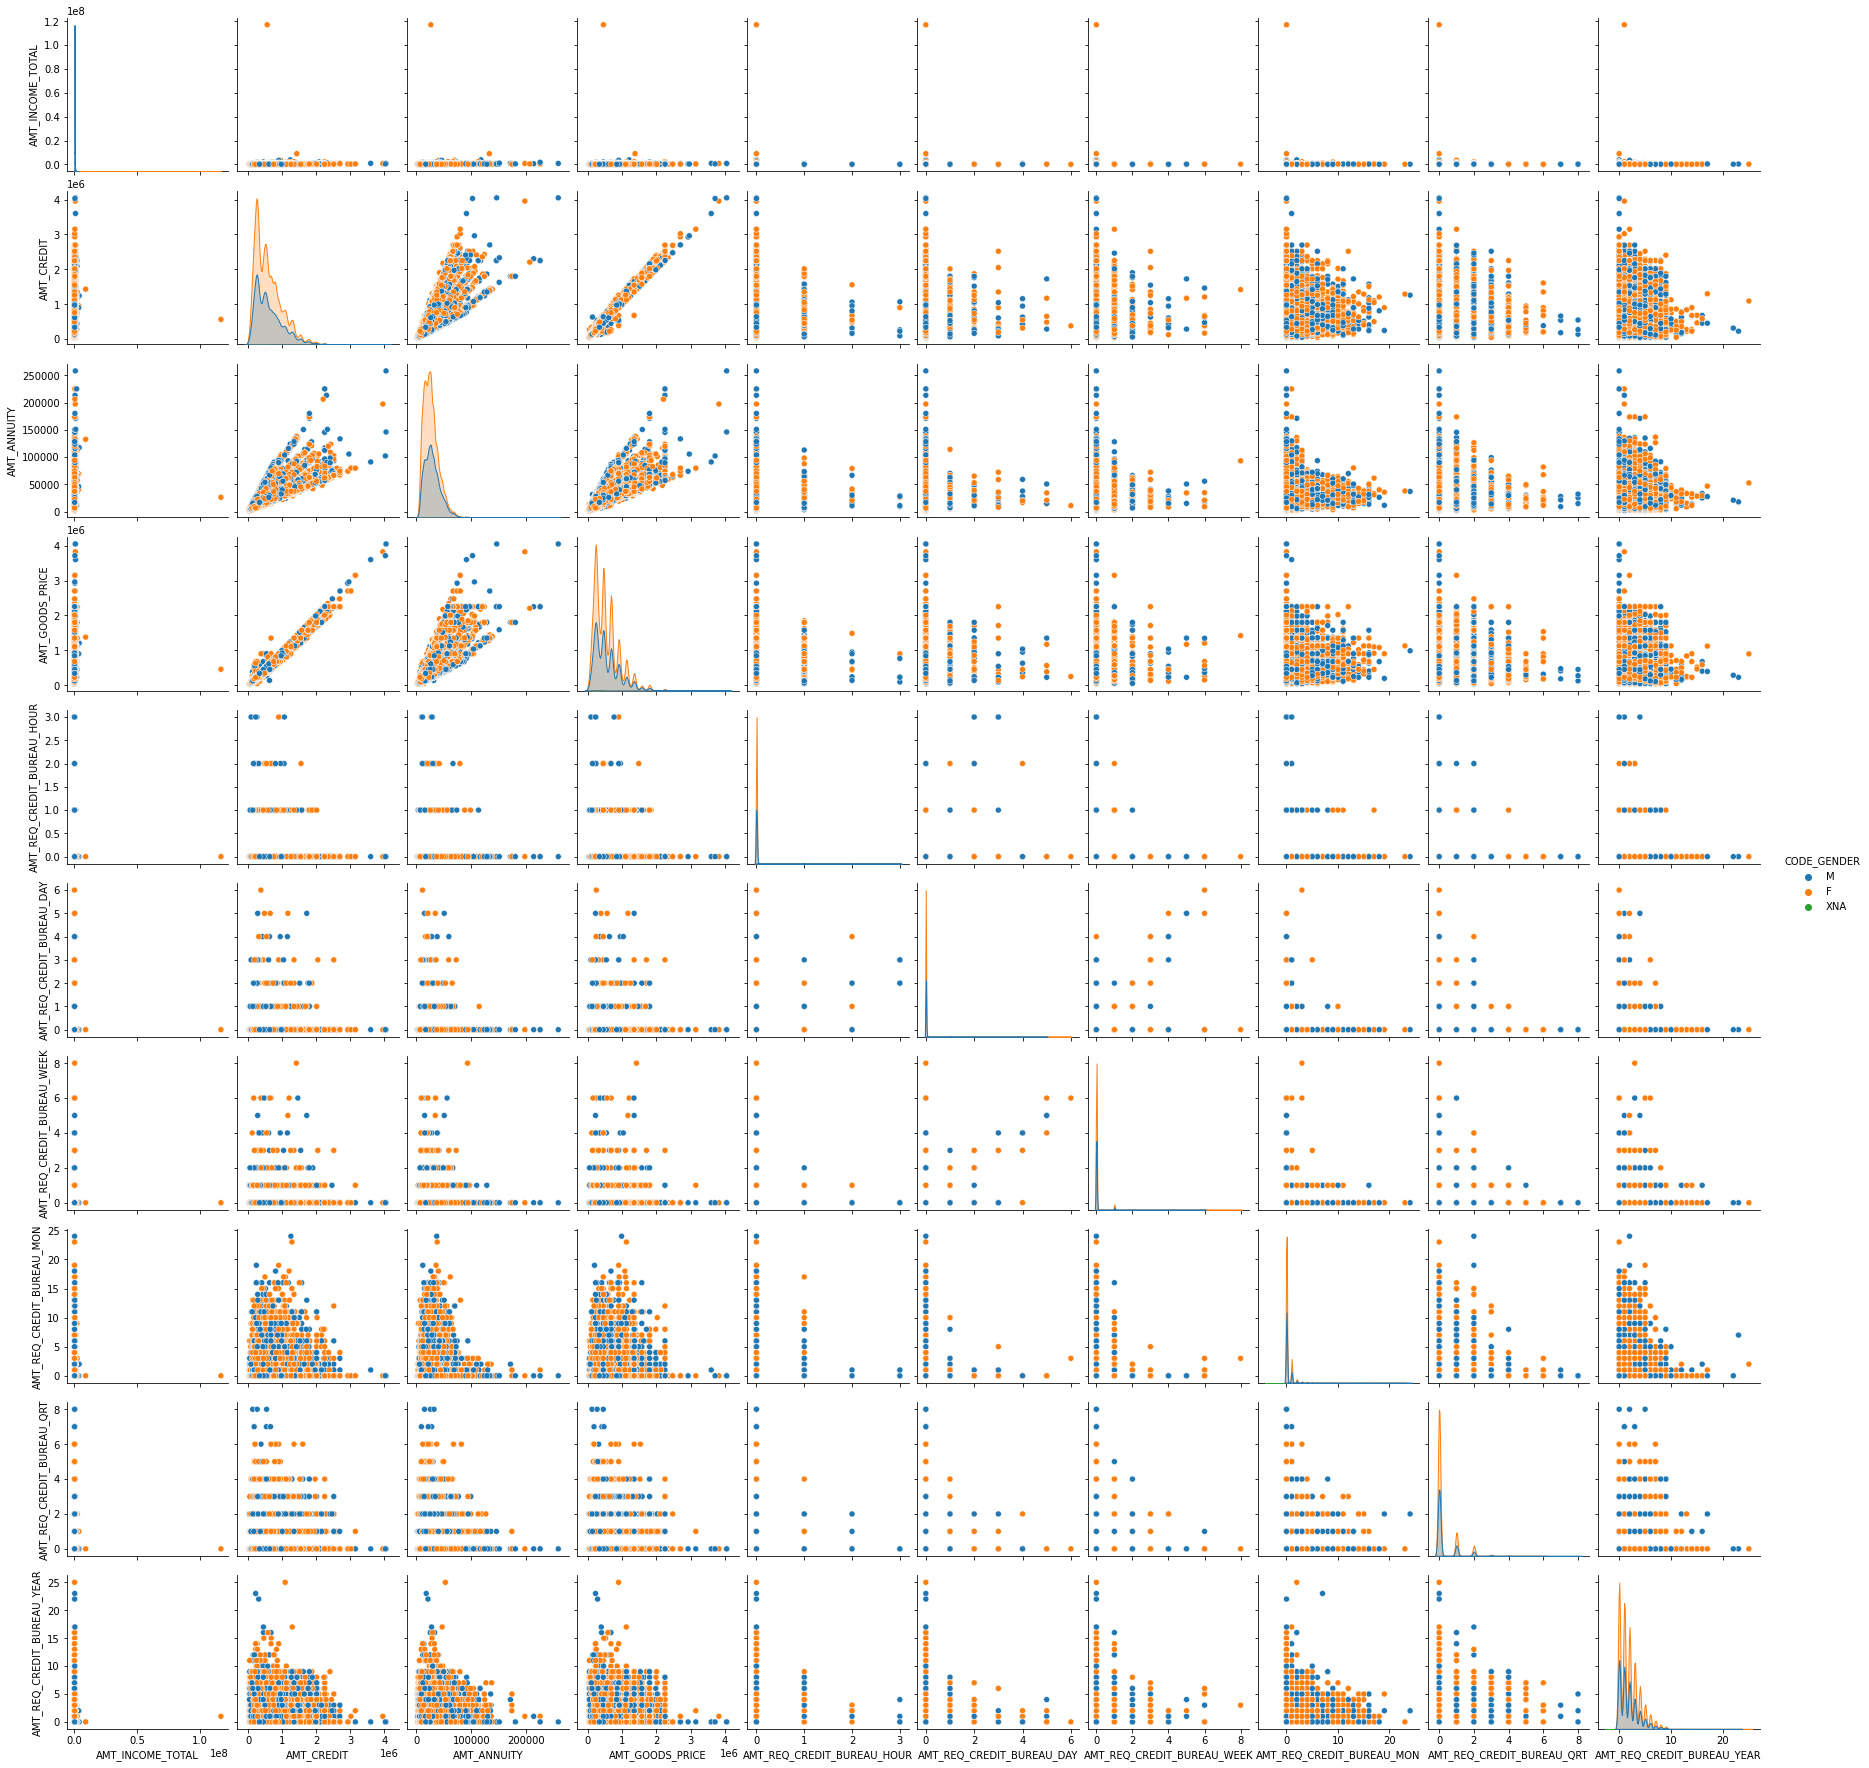

In [14]:
#graph the data for check the relation between the variables
sns.pairplot(data = dfB, hue= 'CODE_GENDER')

In [12]:
dfB = dfB.drop(columns='CODE_GENDER')

In [13]:
dfB

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,202500.0,406597.5,24700.5,351000.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,121500.0,513000.0,21865.5,513000.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
99995,0,157500.0,755190.0,36459.0,675000.0,NaN,NaN,NaN,NaN,NaN,NaN
99996,0,225000.0,284400.0,22599.0,225000.0,0.0,0.0,0.0,1.0,0.0,1.0
99997,0,135000.0,1262583.0,37044.0,1102500.0,0.0,0.0,0.0,0.0,0.0,3.0
99998,0,135000.0,225000.0,6579.0,225000.0,0.0,0.0,0.0,0.0,0.0,4.0


In [14]:
#columns to fill AMT_ANNUITY AMT_GOODS_PRICE	AMT_REQ_CREDIT_BUREAU_HOUR	AMT_REQ_CREDIT_BUREAU_DAY	AMT_REQ_CREDIT_BUREAU_WEEK	AMT_REQ_CREDIT_BUREAU_MON	AMT_REQ_CREDIT_BUREAU_QRT	AMT_REQ_CREDIT_BUREAU_YEAR with quantile 0.98
columns = ['AMT_ANNUITY','AMT_GOODS_PRICE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for i in columns:
    value = dfB[i].quantile(0.98)
    dfB[i] = dfB[i].replace(np.inf,value)
    dfB[i] = dfB[i].replace(-np.inf,value)
    dfB[i] = dfB[i].replace(np.nan,value)

In [15]:
X = dfB.drop(columns=['TARGET'])

y = dfB['TARGET']


In [16]:
# Escalar, escalear, scalear
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [17]:
# Ajustar el modelo
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2,random_state=30, stratify=y)

In [18]:
knn_model = KNeighborsClassifier(n_neighbors = 4) #Modelo vacío

In [19]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4)

In [20]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
y_test.values

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [22]:
confusion_matrix(y_test,y_pred)

array([[18316,    65],
       [ 1612,     7]], dtype=int64)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     18381
           1       0.10      0.00      0.01      1619

    accuracy                           0.92     20000
   macro avg       0.51      0.50      0.48     20000
weighted avg       0.85      0.92      0.88     20000



In [24]:
def plot_knn(n,vars,X):
    b = min(4,int(np.floor(math.sqrt(n))))
    a = int(n/b)
    if(a*b!=n):
        a+=1
    fig, axes = plt.subplots(a,b, figsize=(a*6,b*7), sharey=True , sharex= False)
    scaler = StandardScaler()
    X = X[vars]
    X_scaled = scaler.fit_transform(X)
    X_train_scaled,X_test_scaled,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=30)
    cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
    cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .05),np.arange(y_min, y_max, .05))
    for i in range(n):
        clf = KNeighborsClassifier(n_neighbors = i+1).fit(X_train_scaled,y_train)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        axes.flat[i].set_title(f'# Vecinos: {i+1}, Train_score: {clf.score(X_train_scaled, y_train)},\nTest_score: {clf.score(X_test_scaled, y_test)}')
        axes.flat[i].pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto') 
        axes.flat[i].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
        axes.flat[i].set_xlim(xx.min(), xx.max())
        axes.flat[i].set_ylim(yy.min(), yy.max())
        axes.flat[i].set_xticks([])    
        patch0 = mpatches.Patch(color='#FFAAAA', label='all other cases')
        patch1 = mpatches.Patch(color='#c2f0c2', label='client with payment difficulties')
        axes.flat[i].legend(handles=[patch0, patch1])

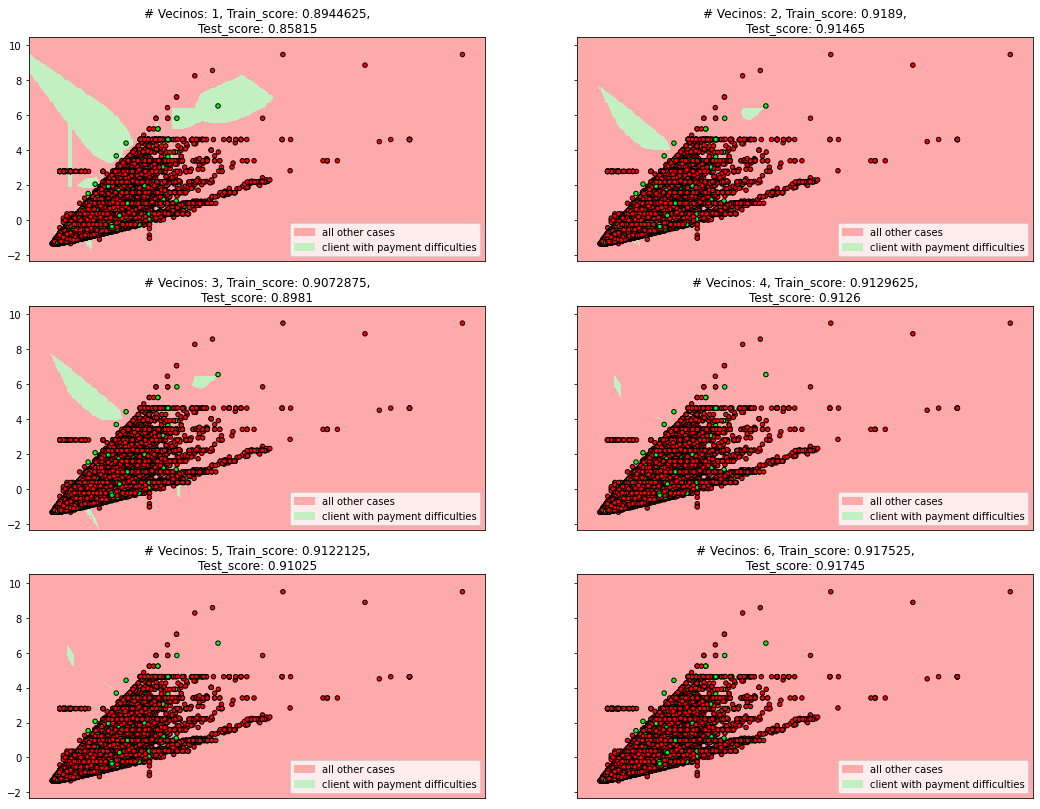

In [27]:
plot_knn(n=6,vars=['AMT_ANNUITY','AMT_GOODS_PRICE'],X=dfB)

In [ ]:
scores_train = []
scores_test = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled,X_test_scaled,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=30)

for k in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled,y_train)
    score_test = knn.score(X_test_scaled,y_test)
    score_train = knn.score(X_train_scaled,y_train)
    scores_test.append(score_test)
    scores_train.append(score_train)
plt.figure(figsize=(15,10))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Accuracy')
plt.plot(range(1,21),scores_train,'*-r',label='Score_train')
plt.plot(range(1,21),scores_test,'*-k',label='Score_test')
plt.xticks([0,5,10,15,20])
plt.legend()
plt.grid()
plt.show()